In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV



In [ ]:
df = pd.read_csv("/content/StudentsPerformance.csv")

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
# Drop target column for now
features = df.drop(['math score'], axis=1)



In [ ]:
# Identify categorical and numerical columns
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()
numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Numerical Columns: ['reading score', 'writing score']


In [ ]:

# Apply Label Encoding to binary columns (e.g., 'gender')
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # male=1, female=0

# One-hot encode other categorical columns
df = pd.get_dummies(df, columns=['race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], drop_first=True)


In [ ]:
scaler = StandardScaler()
# Apply only to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [ ]:

# Only check reading and writing score (normalized)
z_scores = np.abs(zscore(df[numerical_cols]))
outliers = (z_scores > 3).any(axis=1)
print(f"Outliers detected: {outliers.sum()}")



Outliers detected: 5


In [ ]:
df = df[~outliers]

In [ ]:
print("Final shape of dataset:", df.shape)
print("Final feature columns:", df.columns.tolist())


Final shape of dataset: (995, 15)
Final feature columns: ['gender', 'math score', 'reading score', 'writing score', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', "parental level of education_bachelor's degree", 'parental level of education_high school', "parental level of education_master's degree", 'parental level of education_some college', 'parental level of education_some high school', 'lunch_standard', 'test preparation course_none']


In [ ]:
df.head()

,gender,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,72,0.193999,0.391492,True,False,False,False,True,False,False,False,False,True,True
1,0,69,1.427476,1.313269,False,True,False,False,False,False,False,True,False,True,False
2,0,90,1.770109,1.642475,True,False,False,False,False,False,True,False,False,True,True
3,1,47,-0.833899,-1.583744,False,False,False,False,False,False,False,False,False,False,True
4,1,76,0.605158,0.457333,False,True,False,False,False,False,False,True,False,True,True


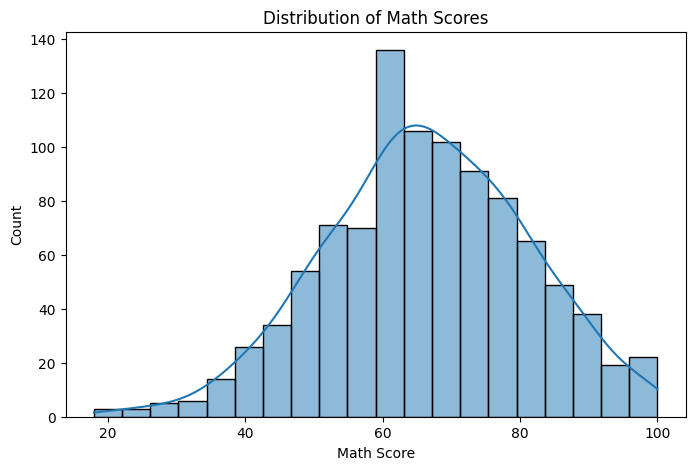

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['math score'], bins=20, kde=True)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Count')
plt.show()


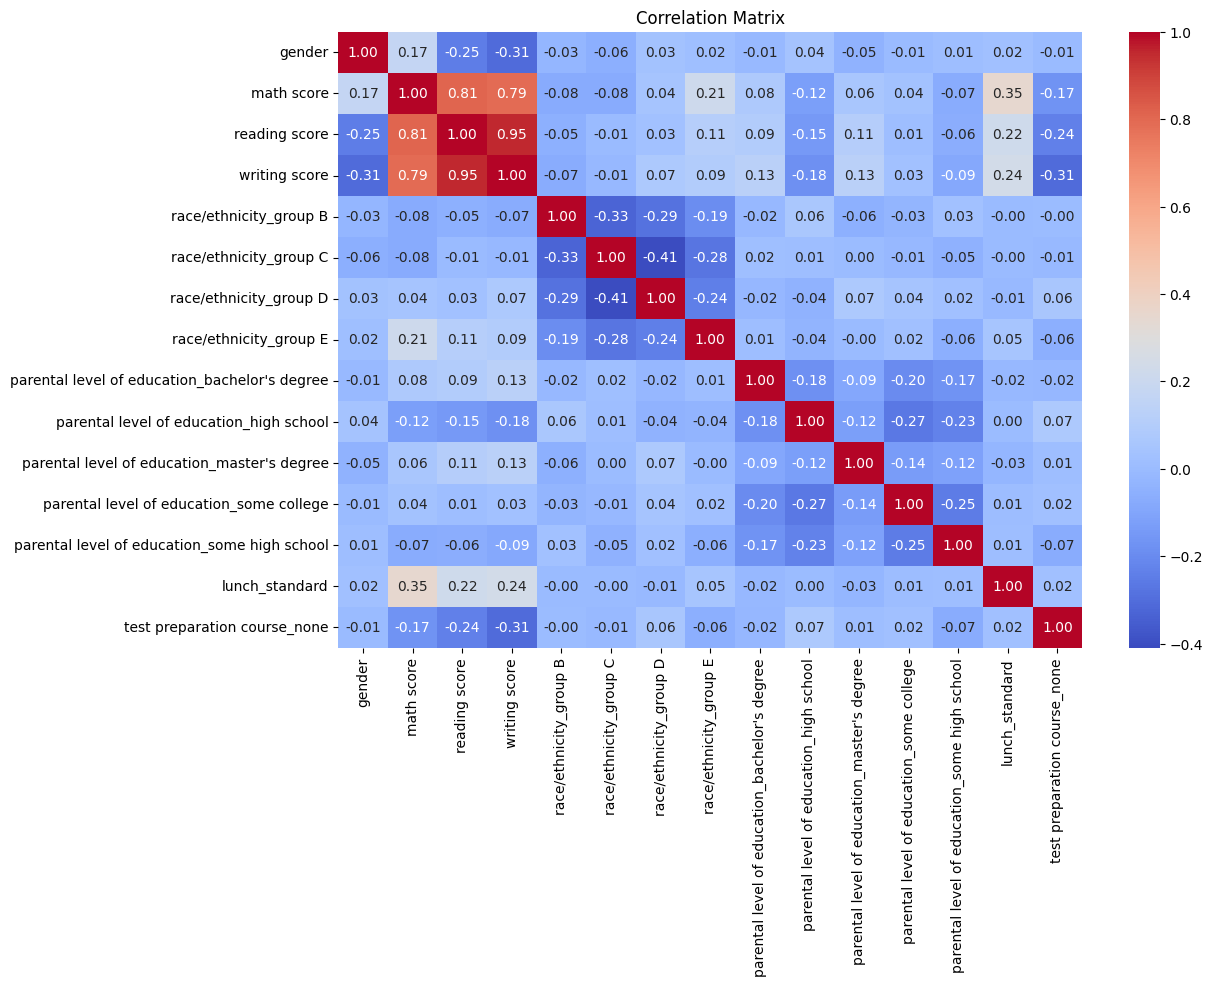

In [ ]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
X = df.drop('math score', axis=1)
y = df['math score']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Fit models on training data
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)


In [ ]:
def evaluate_model(y_true, y_pred, name="Model"):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)  # Manual square root
    mae = mean_absolute_error(y_true, y_pred)

    print(f"----- {name} -----")
    print(f"R² Score       : {r2:.4f}")
    print(f"Root MSE (RMSE): {rmse:.4f}")
    print(f"Mean Abs Error : {mae:.4f}")
    print()


In [ ]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regressor")


----- Linear Regression -----
R² Score       : 0.8972
Root MSE (RMSE): 4.8685
Mean Abs Error : 3.8517

----- Random Forest Regressor -----
R² Score       : 0.8614
Root MSE (RMSE): 5.6549
Mean Abs Error : 4.5003

----- Gradient Boosting Regressor -----
R² Score       : 0.8773
Root MSE (RMSE): 5.3201
Mean Abs Error : 4.2267



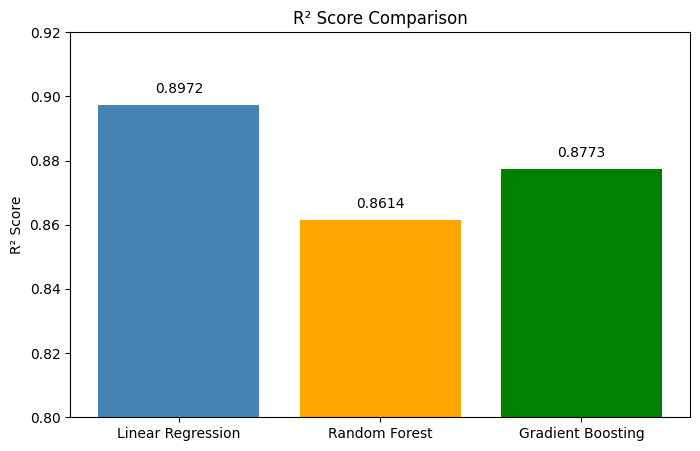

In [ ]:

# Model names and R² values
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
r2_scores = [0.8972, 0.8614, 0.8773]

plt.figure(figsize=(8, 5))
bars = plt.bar(models, r2_scores, color=['steelblue', 'orange', 'green'])
plt.ylim(0.8, 0.92)
plt.title('R² Score Comparison')
plt.ylabel('R² Score')

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.003, f"{yval:.4f}", ha='center', va='bottom')

plt.show()


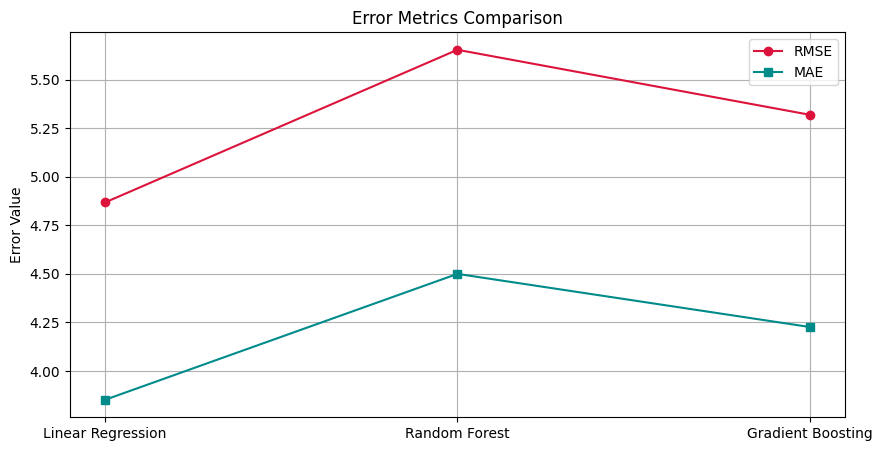

In [ ]:
# Metrics
rmse = [4.8685, 5.6549, 5.3201]
mae = [3.8517, 4.5003, 4.2267]

plt.figure(figsize=(10, 5))
plt.plot(models, rmse, marker='o', label='RMSE', color='crimson')
plt.plot(models, mae, marker='s', label='MAE', color='darkcyan')

plt.title('Error Metrics Comparison')
plt.ylabel('Error Value')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

param_grid_gb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5]
}


In [ ]:


# Random Forest GridSearchCV
grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

# Gradient Boosting GridSearchCV
grid_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid_gb,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)
grid_gb.fit(X_train, y_train)

# Print best parameters
print("Best Random Forest Params:", grid_rf.best_params_)
print("Best Gradient Boosting Params:", grid_gb.best_params_)
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_



Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Gradient Boosting Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}


In [ ]:


# Predict and evaluate on test set
evaluate_model(y_test, best_rf.predict(X_test), "Random Forest (Tuned)")
evaluate_model(y_test, best_gb.predict(X_test), "Gradient Boosting (Tuned)")

# 5-fold Cross-validation on full dataset
cv_rf = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
cv_gb = cross_val_score(best_gb, X, y, cv=5, scoring='r2')

print(f"Random Forest CV R²: {cv_rf.mean():.4f} ± {cv_rf.std():.4f}")
print(f"Gradient Boosting CV R²: {cv_gb.mean():.4f} ± {cv_gb.std():.4f}")

----- Random Forest (Tuned) -----
R² Score       : 0.8684
Root MSE (RMSE): 5.5088
Mean Abs Error : 4.3792

----- Gradient Boosting (Tuned) -----
R² Score       : 0.8766
Root MSE (RMSE): 5.3343
Mean Abs Error : 4.2453

Random Forest CV R²: 0.8354 ± 0.0191
Gradient Boosting CV R²: 0.8528 ± 0.0165


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Base (untuned) values
base_models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']

# Untuned scores
r2_base = [0.8972, 0.8614, 0.8773]
rmse_base = [4.8685, 5.6549, 5.3201]

# Tuned scores
r2_tuned = [0.8972, 0.8684, 0.8766]  # Linear Regression doesn't change
rmse_tuned = [4.8685, 5.5088, 5.3343]
mae_base = [3.8517, 4.5003, 4.2267]
mae_tuned = [3.8517, 4.3792, 4.2453]  # Linear Regression stays the same

mae_reduction = np.array(mae_base) - np.array(mae_tuned)


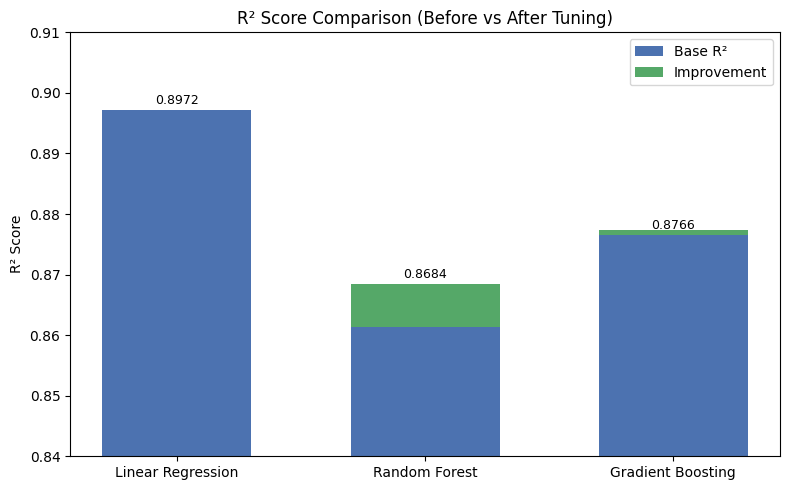

In [ ]:
x = np.arange(len(base_models))
width = 0.6

r2_improvement = np.array(r2_tuned) - np.array(r2_base)

plt.figure(figsize=(8, 5))

# Base R² bars
bars1 = plt.bar(x, r2_base, width, label='Base R²', color='#4c72b0')

# Improvement bars (overlay)
bars2 = plt.bar(x, r2_improvement, width, bottom=r2_base, label='Improvement', color='#55a868')

plt.xticks(x, base_models)
plt.ylabel('R² Score')
plt.title('R² Score Comparison (Before vs After Tuning)')
plt.ylim(0.84, 0.91)

# Add value labels
for i in range(len(x)):
    plt.text(x[i], r2_base[i] + r2_improvement[i] + 0.001, f"{r2_tuned[i]:.4f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()


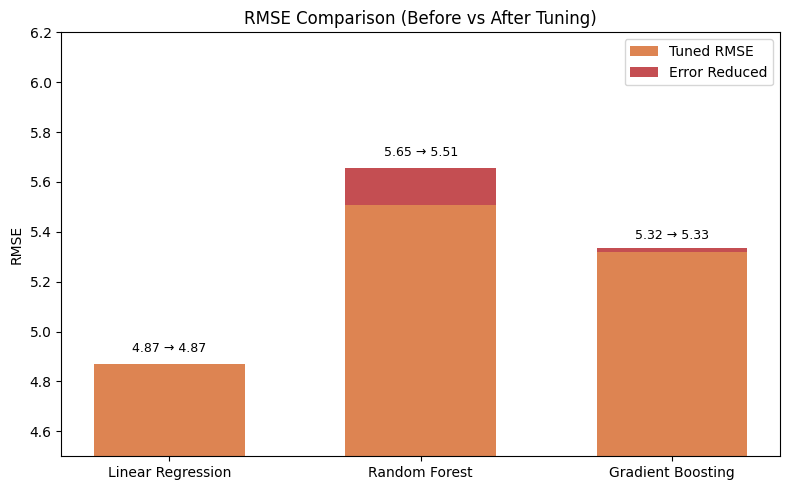

In [ ]:
rmse_reduction = np.array(rmse_base) - np.array(rmse_tuned)

plt.figure(figsize=(8, 5))

# Tuned RMSE bars (bottom part)
bars1 = plt.bar(x, rmse_tuned, width, label='Tuned RMSE', color='#dd8452')

# Reduction bars (top part)
bars2 = plt.bar(x, rmse_reduction, width, bottom=rmse_tuned, label='Error Reduced', color='#c44e52')

plt.xticks(x, base_models)
plt.ylabel('RMSE')
plt.title('RMSE Comparison (Before vs After Tuning)')
plt.ylim(4.5, 6.2)

# Add value labels
for i in range(len(x)):
    plt.text(x[i], rmse_base[i] + 0.05, f"{rmse_base[i]:.2f} → {rmse_tuned[i]:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()


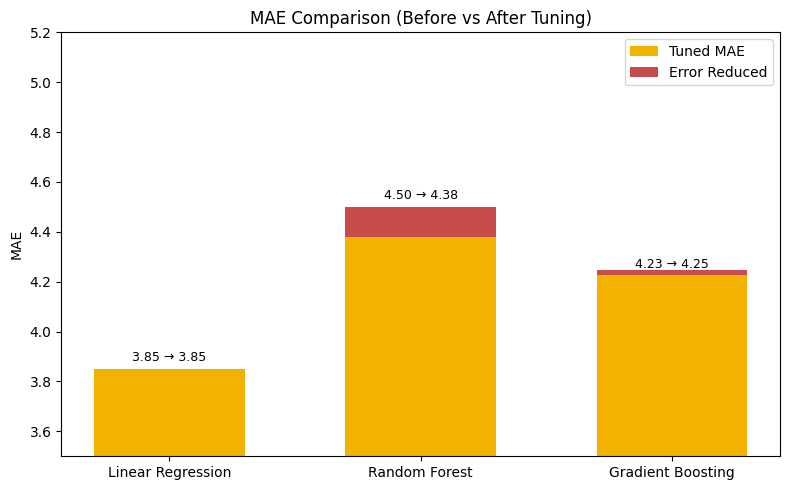

In [ ]:
plt.figure(figsize=(8, 5))

# Tuned MAE bars (bottom part)
bars1 = plt.bar(x, mae_tuned, width, label='Tuned MAE', color='#f3b100')

# Reduction bars (top part)
bars2 = plt.bar(x, mae_reduction, width, bottom=mae_tuned, label='Error Reduced', color='#c94c4c')

plt.xticks(x, base_models)
plt.ylabel('MAE')
plt.title('MAE Comparison (Before vs After Tuning)')
plt.ylim(3.5, 5.2)

# Add value labels
for i in range(len(x)):
    plt.text(x[i], mae_base[i] + 0.03, f"{mae_base[i]:.2f} → {mae_tuned[i]:.2f}", ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
import joblib


In [ ]:
# Reuse the column names from your dataset
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_cols = ['reading score', 'writing score']


In [ ]:
# Preprocessor: encode + scale
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numerical_cols)
])

# Final prediction pipeline with best model
final_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', best_gb)
])


In [ ]:
print(X.columns.tolist())


['gender', 'reading score', 'writing score', 'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', "parental level of education_bachelor's degree", 'parental level of education_high school', "parental level of education_master's degree", 'parental level of education_some college', 'parental level of education_some high school', 'lunch_standard', 'test preparation course_none']


In [ ]:
import pandas as pd

a = pd.read_csv('/content/StudentsPerformance.csv')

b = a.drop('math score', axis=1)  # features
target = a['math score']          # target


In [ ]:
final_pipeline.fit(b, target)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'race/ethnicity',
                                                   'parental level of '
                                                   'education',
                                                   'lunch',
                                                   'test preparation course']),
                                                 ('num', StandardScaler(),
                                                  ['reading score',
                                                   'writing score'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=150,
                                           random_state=42))])

In [ ]:
import joblib
joblib.dump(final_pipeline, 'math_score_predictor.pkl')


['math_score_predictor.pkl']

In [ ]:
# Sample prediction
new_input = pd.DataFrame([{
    'gender': 'male',
    'race/ethnicity': 'group B',
    'parental level of education': 'associate\'s degree',
    'lunch': 'free/reduced',
    'test preparation course': 'none',
    'reading score': 70,
    'writing score': 65
}])

# Predict
predicted_score = final_pipeline.predict(new_input)[0]
print(f"Predicted Math Score: {predicted_score:.2f}")


Predicted Math Score: 69.31
